In [ ]:
# import the necessary packages
import numpy as np
import imutils
import cv2
import matplotlib.pyplot as plt


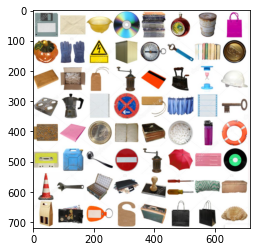

In [ ]:
image = cv2.imread("collection.png");
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(imutils.opencv2matplotlib(image))
plt.show()

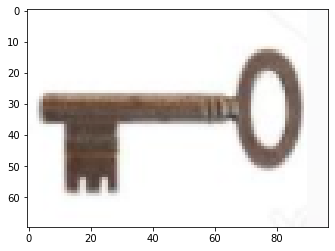

In [ ]:
tt=image[280:350,620:720]
plt.imshow(imutils.opencv2matplotlib(tt))
plt.show()

In [ ]:
#cv2.imwrite("key.png", tt)

In [ ]:
# load the image image, convert it to grayscale
template = cv2.imread("key.png")
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
(tH, tW) = template.shape[:2]
cv2.imshow("Template", template)
cv2.waitKey(0)

-1

In [ ]:
image = cv2.imread("collection.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


# loop over the scales of the image
for scale in np.linspace(0.04, 0.2, 10)[::-1]:

    # resize the image and template according to the scale
    resized = imutils.resize(gray, width = int(gray.shape[1] * scale))
    resized_temp = imutils.resize(template, width = int(template.shape[1] * scale))
    (tH, tW) = resized_temp.shape[:2]

    # keep track of the ratio of the resizing
    r  = gray.shape[1] / float(resized.shape[1])
    print(r)

    # if the resized image is smaller than the template, then break
    if resized.shape[0] < tH or resized.shape[1] < tW:
        break


    # apply template matching to find the template in the image
    result = cv2.matchTemplate(resized, resized_temp, cv2.TM_CCOEFF_NORMED)
    (mv, maxVal, ml, maxLoc) = cv2.minMaxLoc(result)

    # if first time found=None (the initial value), then
    # if we found a new maximum similarity we update the bookkeeping variable

    if found is None or maxVal > found[0]:
        found = (maxVal, maxLoc, r) # note r: ratio of the resizing

    print(maxVal)

    # unpack the bookkeeping variable and
    #(mxv, maxLoc, r) = found

    #compute the (x, y) coordinates of the bounding box based on the resized ratio
    #pt1
    (startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
    #pt2
    (endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r))



    # draw a bounding box around the detected result and display the image
    #cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
    #cv2.imshow("Image"+str(scale), image)
    #cv2.waitKey(0)

    #you may create the rectangle in a copy of the image
    img=image.copy()
    cv2.rectangle(img, (startX, startY), (endX, endY), (0, 0, 255), 2)
    cv2.imshow("Image"+str(scale), img)
    cv2.waitKey(0)


    #draw at each step in the scaled size
    #clone = resized.copy()
    #cv2.rectangle(clone, (maxLoc[0], maxLoc[1]),(maxLoc[0] + tW, maxLoc[1] + tH), (0, 255, 0), 2)
    #cv2.imshow("Resized by %.2f"%(scale), clone)
    #cv2.waitKey(0)

5.013986013986014
0.9716223478317261
5.515384615384615
0.9612758159637451
6.128205128205129
0.8424949645996094
6.828571428571428
0.9920205473899841
7.793478260869565
0.8829652667045593
9.075949367088608
0.8990606069564819
10.863636363636363
0.9895874857902527
13.277777777777779
0.9515324234962463
17.48780487804878
0.8183416724205017
25.607142857142858
0.8962116241455078


In [ ]:
image = cv2.imread("collection.png",0)
template = cv2.imread("key.png",0)
im_res=imutils.resize(template, width = int(template.shape[1] * 0.075))
tp_res=imutils.resize(image, width = int(image.shape[1] * 0.075))

In [ ]:
%%time
r1=cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

Wall time: 21 ms


In [ ]:
%%time
r1=cv2.matchTemplate(im_res, tp_res, cv2.TM_CCOEFF_NORMED)

Wall time: 0 ns
